# IFT 4030 / 7030, Machine Learning for Signal Processing, Lab 4

In this lab we will cover material from lecture 4. You will be asked questions related to the material we covered during the lecture.

This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn. (if you are below 50%, you will get 0% towards your final grade)

This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.

You can use pytorch or numpy. But I recommend that you use pytorch as it will serve you better in the rest of the class!

If you do not have a google (gmail) account, you will not be able run the cells. So get one! Also, make sure you create a local copy, so that you can save your work, and then you can upload your work on teams. After you are happy with your work, upload your work on 'Lab 4' in teams. Have a nice lab!

-----------------------

Dans ce laboratoire, nous couvrirons le matériel du cours 4. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.

Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris. (Si vous êtes en dessous de 50%, vous obtiendrez 0% vers votre note finale)

Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.

Vous pouvez utiliser pytorch ou numpy. Mais je vous recommande d'utiliser pytorch car il vous servira mieux dans le reste de la classe!

Si vous n'avez pas de compte google (gmail), vous ne pourrez pas exécuter les cellules. Alors obtenez-en un! Assurez-vous également de créer une copie locale, afin de pouvoir enregistrer votre travail, puis de télécharger votre travail sur Teams. Une fois que vous êtes satisfait de votre travail, téléchargez votre travail sur 'Lab 4' en teams. Je vous souhaite un beau laboratoire!

# Q1: Linear Regression (40pt)

In the class we talked a lot about matrix decomposition formulation and how it can capture many machine learning problems. One of those problems is linear regression. In this question we will first create a dataset and then pretend as if we don't know the underlying model and see if we can get the same parameters.

## Q1a: Get the basis matrix and plot(10pt)

Obtain a basis matrix that has the bases $b_1(t) = t$, $b_2(t) = t^2$, $b_3(t) = t^3$, $b_4(t) = t^4$, $b_5(t) = t^2 cos (2\pi (1/4) t )$. Form the $B$ matrix such that these functions will be evaluated and placed on the columns. Evaluate the functions for $t$ within the interval $[-1, 1]$, and use 200 uniformly sampled points. (Hint you can use `torch.linspace()`)

Plot the obtained basis matrix in a format similar to what we see in slide 9.
-----------------

# Q1 : Régression linéaire (40 pts)

En classe, nous avons beaucoup parlé de la formulation de la décomposition matricielle et de la façon dont elle peut capturer de nombreux problèmes d'apprentissage automatique. L'un de ces problèmes est la régression linéaire. Dans cette question, nous allons d'abord créer un ensemble de données, puis faire comme si nous ne connaissions pas le modèle sous-jacent et voir si nous pouvons obtenir les mêmes paramètres.

## Q1a : Obtenez la matrice de base et le tracé (10 pt)

Obtenez une matrice de base qui a les bases $b_1(t) = t$, $b_2(t) = t^2$, $b_3(t) = t^3$, $b_4(t) = t^4$, $b_5(t) = t^2 cos (2\pi (1/4) t )$. Formez la matrice $B$ de telle sorte que ces fonctions soient évaluées et placées sur les colonnes. Évaluez les fonctions pour $t$ dans l'intervalle $[-1, 1]$ et utilisez 200 points uniformément échantillonnés. (Indice, vous pouvez utiliser `torch.linspace()`)

Tracez les bases obtenu dans un format similaire à ce qu'on voit dans le slide 9.




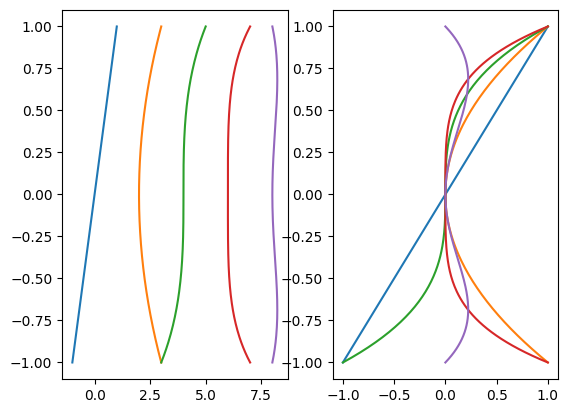

In [2]:
import torch
import matplotlib.pyplot as plt


#### travaillez ici
t= torch.linspace(-1, 1, 200)
b1 = t
b2 = t**2
b3 = t**3
b4 = t**4
b5 = t**2*(torch.cos(2*torch.pi*(1/4)*t))

B = torch.stack([b1, b2, b3, b4, b5], dim=1)
# you can use the code below to plot / vous pouvez utiliser la code en bas pour les traces.
shft = 2
plt.subplot(121)
plt.plot(b1, t)
plt.plot(b2 + shft, t)
plt.plot(b3 + 2*shft, t)
plt.plot(b4 + 3*shft, t)
plt.plot(b5 + 4*shft, t)

plt.subplot(122)
plt.plot(B.numpy(), t)
plt.show()


## Q1b. Generate Data (10pt)

Generate data by creating using the weights $w = [0.1, -1, 0.5, 0, 1]$. Get the data simply by calculating the matrix-vector multiplication and adding Gaussian noise $x = B w + n$, where $n \sim \mathcal N(x; 0, \sigma^2)$. Set $\sigma = 1$. Plot the resulting signal.

-------------------

## Q1b. Générer des données (10 pt)

Générez des données en créant à l'aide des poids $w = [0.1, -1, 0.5, 0, 1]$. Obtenez les données simplement en calculant la multiplication matrice-vecteur et en ajoutant le bruit gaussien $x = B w + n$, où $n \sim \mathcal N(x; 0, \sigma^2)$. Définissez $\sigma = 1$. Tracez le signal résultant.


torch.Size([200])


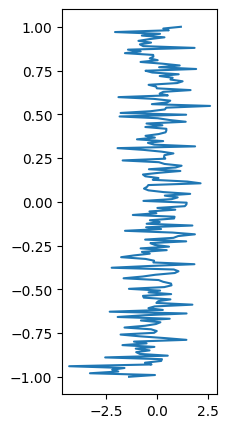

In [3]:
w = torch.tensor([0.1, -1, 0.5, 0, 1])

# travaillez ici
n=  torch.randn(B.shape[0])
x_obs = B @ w + n

print(x_obs.shape)
plt.figure(figsize=[2, 5], dpi=100)

plt.plot(x_obs, t)



## Q1.c Estimate w (10pt)

By using the least square / maximum likelihood estimation for $w$, estimate an optimal $w$, such that $\widehat w = (B^\top B)^{-1} B^\top x$.

Print the estimate $\widehat w$, is it close to the original one?

If so, plot the observed signal $x$ (the signal you generated above), and your estimated reconstruction $\widehat x : = B \widehat w$ on top of each other to see the quality of the estimate.

------------------

## Q1.c Estimation de w (10pt)

En utilisant l'estimation des moindres carrés/maximum de vraisemblance pour $w$, estimez un $w$ optimal, tel que $\widehat w = (B^\top B)^{-1} B^\top x$.

Imprimez le devis $\widehat w$, est-il proche de celui d'origine ?

Si tel est le cas, tracez le signal observé $x$ (le signal que vous avez généré ci-dessus) et votre reconstruction estimée $\widehat x : = B \widehat w$ l'un sur l'autre pour voir la qualité de l'estimation.

tensor([ 0.0608,  0.3891,  0.5981, -1.4610,  0.3121])
84.7431869506836
torch.Size([200])


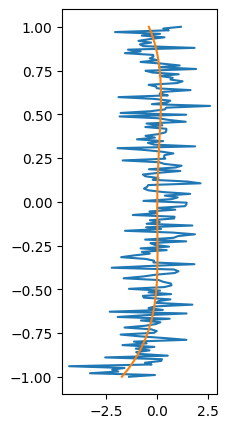

In [4]:

# travaillez ici
what = (B.T @ B).inverse() @ B.T @ x_obs

print(what)

cosinus_similarity_between_w_and_what = torch.rad2deg(torch.cosine_similarity(w, what, dim=0).arccos()).item()
print(cosinus_similarity_between_w_and_what)

xhat = B @ what
print(xhat.shape)

plt.figure(figsize=[2, 5], dpi=100)

plt.plot(x_obs, t)
plt.plot(xhat, t)


# Q2: Autoregressive COVID modeling

Now, we will use the matrix decomposition framework in a slightly different way. We will use past samples to predict the future. (class 4, slide 14)

## Q2a. Training the model (15pt)

Construct a basis matrix such that, to predict $x_t$, we use $x_{t-1}$, $x_{t-2}$, and $x_{t-3}$. Train the model with least squares and obtain the model weights. After obtaining the model weights on the train set, plot the reconstruction to see how well the model is able to fit the data.

-------------------------

# Q2 : Modélisation autorégressive du COVID

Nous allons maintenant utiliser le cadre de décomposition matricielle d’une manière légèrement différente. Nous utiliserons des échantillons passés pour prédire l’avenir. (cours 4, diapositive 14)

## Q2a. Entraîner le modèle (15pt)

Construisez une matrice de base telle que, pour prédire $x_t$, nous utilisons $x_{t-1}$, $x_{t-2}$ et $x_{t-3}$. Entraînez le modèle avec les moindres carrés et obtenez les poids du modèle. Après avoir obtenu les poids du modèle sur la rame, tracez la reconstruction pour voir dans quelle mesure le modèle est capable de s'adapter aux données.

In [6]:
# first download the data
!curl -o covid-data.csv https://sourceseparationresearch.com/static/mlsp_data/covid-data.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  9 49.1M    9 4565k    0     0  4993k      0  0:00:10 --:--:--  0:00:10 5000k
 23 49.1M   23 11.5M    0     0  6209k      0  0:00:08  0:00:01  0:00:07 6215k
 36 49.1M   36 17.7M    0     0  6231k      0  0:00:08  0:00:02  0:00:06 6234k
 49 49.1M   49 24.5M    0     0  6411k      0  0:00:07  0:00:03  0:00:04 6412k
 63 49.1M   63 31.2M    0     0  6518k      0  0:00:07  0:00:04  0:00:03 6520k
 77 49.1M   77 38.1M    0     0  6606k      0  0:00:07  0:00:05  0:00:02 6900k
 92 49.1M   92 45.5M    0     0  6747k      0  0:00:07  0:00:06  0:00:01 6953k
100 49.1M  100 49.1M    0     0  6777k      0  0:00:07  0:00:07 --:--:-- 7131k


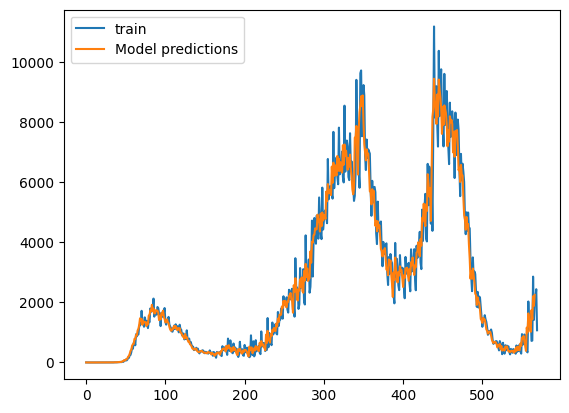

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import torch

# load the data
df = pd.read_csv('covid-data.csv')
cases = torch.from_numpy(df[df.location == 'Canada'].new_cases.values)

T_test = 250
T_train = cases.shape[0] - T_test
p = 3

# split the data
x_train = cases[:T_train]
x_test = cases[T_train:]

# form the basis matrix for the train data / formez la matrice de base
X_train = torch.zeros(T_train - p, p)
y_train = torch.zeros(T_train - p)

for i in range(p, x_train.shape[0]):
    X_train[i - p, :] = x_train[i - p:i]
    y_train[i - p] = x_train[i]

# solve for the activation coefficients / trouvez une solution pour les activations
w_train = (X_train.T @ X_train).inverse() @ X_train.T @ y_train

# estimates on training set / estimées sur le train

xhat= X_train @ w_train

plt.plot(x_train, label='train')
plt.plot(xhat, label='Model predictions')
plt.legend()
plt.show()


# Q2b. Testing (15pt)

Form a basis matrix for the test data now, by using the past samples. Then plot results with a plot similar to what we have in slide 15. (Training and testing on the same plot, where we show the train/test cutoff with a dashed vertical line)

----------------

# Q2b. Test (15pt)

Formez maintenant une matrice de base pour les données de test, en utilisant les échantillons passés. Tracez ensuite les résultats avec un tracé similaire à celui que nous avons dans la diapositive 15. (Formation et tests sur le même tracé, où nous montrons la coupure d'entraînement/test avec une ligne verticale pointillée)

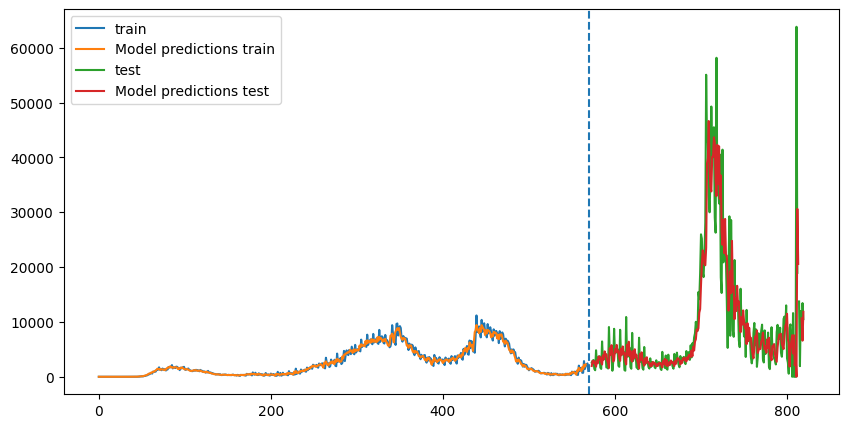

In [47]:

# travaillez ici

# form the design matrix for test data / formez la matrice de bases sur test
X_test = torch.zeros(T_test - p, p)
y_test = torch.zeros(T_test - p)

for i in range(p, x_test.shape[0]):
    X_test[i - p, :] = x_test[i - p:i]
    y_test[i - p] = x_test[i]

# estimates on test set / estimées sur le test

xhat_test = X_test @ w_train

plt.figure(figsize=[10, 5], dpi=100)
plt.plot(x_train, label='train')
plt.plot(xhat, label='Model predictions train')
plt.axvline(T_train, linestyle='--')
plt.plot(torch.arange(T_train + p, T_train + T_test), x_test[p:], label='test')
plt.plot(torch.arange(T_train + p, T_train + T_test), xhat_test, label='Model predictions test')
plt.legend()
plt.show()




# Q3: Non-Negative Matrix Factorization of Toy Data (30pt)

---

# Q3 : Factorisation matricielle non négative des données sur les jouets (30 pts)



We will first generate some data to be analysed by NMF.

-----------

Nous allons d’abord générer quelques données qui seront analysées par NMF.

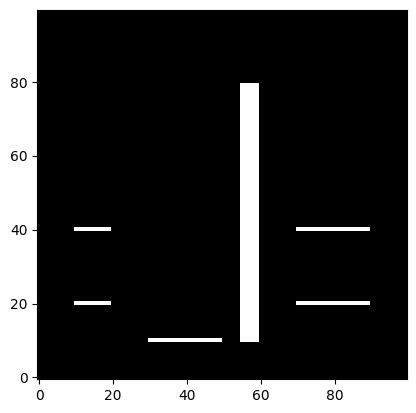

In [20]:
X = torch.zeros(100, 100)

# event1
X[20, 10:20] = 1
X[40, 10:20] = 1

# event 2
X[10, 30:50] = 1

# event 3
X[10:80, 55:60] =1

# event 4
X[20, 70:90] = 1
X[40, 70:90] = 1

plt.imshow(X, cmap='gray', origin='lower')

## Q3a. Alternating Least Squares for NMF: (20pt)

Write an alternating least squares algorithm for NMF. After doing the least squares updates for each factor, zero-out the components by clamping to a value of zero. Use $K = 3$ latent components. The algorithm description is given in slide 55, class 4. Pick a tolerance value $\epsilon$ small, but not too small. (If it is too small your algorithm will not converge, if too large you won't learn much, e.g. $10^{-4}$ should work)

---------

## Q3a. Moindres carrés alternés pour NMF : (20 pt)

Écrivez un algorithme des moindres carrés alternés pour NMF. Après avoir effectué les mises à jour des moindres carrés pour chaque facteur, mettez les composants à zéro en les fixant à une valeur de zéro. Utilisez $K = 3$ de composants latents. La description de l'algorithme est donnée dans la diapositive 55, cours 4. Choisissez une valeur de tolérance $\epsilon$ petite, mais pas trop petite. (S'il est trop petit, votre algorithme ne convergera pas, s'il est trop grand, vous n'apprendrez pas grand-chose. Par exemple $10^{-4}$ devrait fonctionner.)

In [35]:
K = 3 # number of latent components. / nombre des composants latents
L = 100 # the number of observable dimensions / nombres des dimensionnes observables

# Initialize W and H with non-negative values
What = torch.rand(L, K)
Hhat = torch.rand(K, L)

epsilon = 1e-4
error = 1
i = 0
while error > epsilon:

  # Update H
    Hhat = torch.linalg.lstsq(W, X)[0]
    Hhat = torch.clamp(H, min=0)

    # Update W  
    What = torch.linalg.lstsq(H.T, X.T)[0].T
    What = torch.clamp(W, min=0)

    # Compute the reconstruction error
    Xhat = What @ Hhat
    error = torch.norm(X - Xhat, 'fro')
    i += 1

print("Converged in {} iterations with error: {}".format(i, error))



Converged in 1 iterations with error: 6.613161531277001e-06


## Q3b. Interpret the results (10pt)

Plot $\widehat W$, $\widehat H$, and the reconstuction $\widehat X = \widehat W \widehat H$. Interpret the results with few sentences. What are the unwanted qualities in $\widehat W$, $\widehat H$ that you can think of? (

------------

## Q3b. Interpréter les résultats (10pt)

Tracez $\widehat W$, $\widehat H$ et la reconstitution $\widehat X = \widehat W \widehat H$. Interprétez les résultats en quelques phrases. Quelles sont les qualités indésirables de $\widehat W$, $\widehat H$ auxquelles vous pouvez penser ?

Text(0.5, 1.0, 'Input')

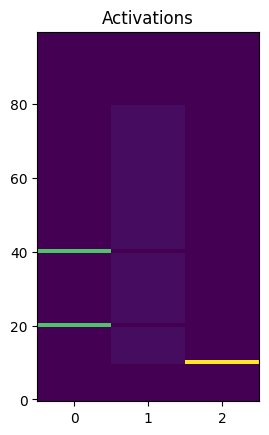

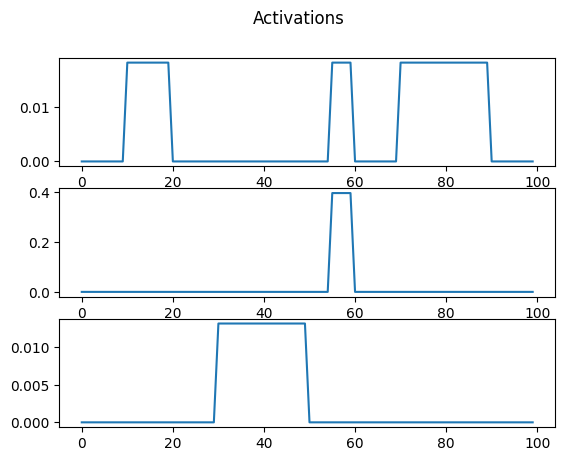

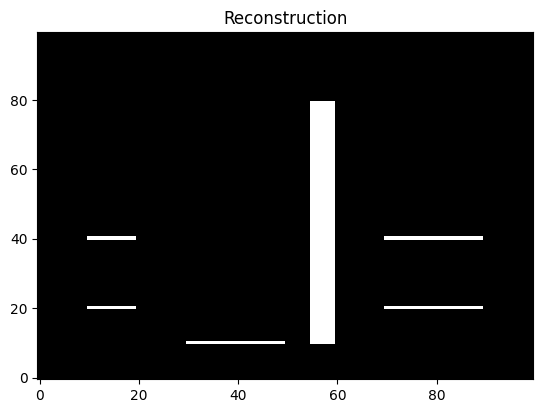

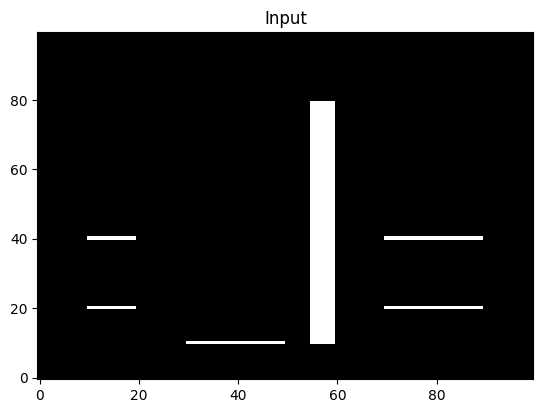

In [36]:
plt.figure()
plt.imshow(What, aspect=0.05, origin='lower')
plt.title('Activations')

plt.figure()
plt.subplot(311)
plt.plot(Hhat[0, :])
plt.subplot(312)
plt.plot(Hhat[1, :])
plt.subplot(313)
plt.plot(Hhat[2, :])
plt.suptitle('Activations')

plt.figure()
plt.imshow(Xhat, origin='lower', cmap='gray', aspect=0.7)
plt.title('Reconstruction')

plt.figure()
plt.imshow(X, origin='lower', cmap='gray', aspect=0.7)
plt.title('Input')

Add your interpretation of the results (obtained basis matrix and activations) here:

----------

Ajoutez de votre intérpretation içi pour les résultats (la matrice de base et les activations):

.

# Q3.c (Bonus) (20pt)

Implement the NMF algorithm with multiplicative update rules:

Eq. 7 in https://www.ee.columbia.edu/~dpwe/e6820/papers/SmarB03-nmf.pdf.

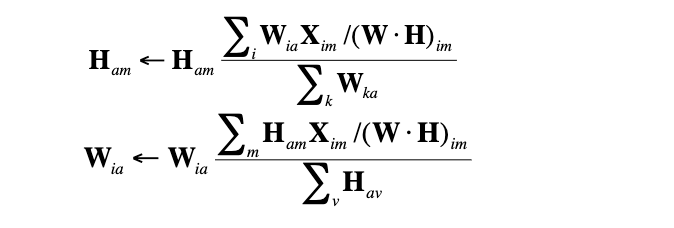

-------------------------

# Q3.c (Bonus) (20pts)

Implémentez l'algorithme NMF avec des règles de mise à jour multiplicatives :

Éq. 7 dans https://www.ee.columbia.edu/~dpwe/e6820/papers/SmarB03-nmf.pdf


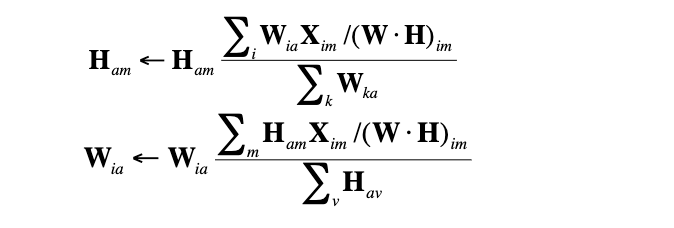

In [48]:
# Initialize W and H with non-negative values
W = torch.rand(L, K)
H = torch.rand(K, L)

# Set the number of iterations and tolerance
i = 0
epsilon = 1e-4

while error > epsilon:
    
    H = H * (W.T @ X) / (W.T @ W @ H + epsilon)
    
    W = W * (X @ H.T) / (W @ H @ H.T + epsilon)
    
    X_hat = W @ H
    error = torch.norm(X - X_hat)
    i += 1

print("Converged in {} iterations with error: {}".format(i, error))

Converged in 0 iterations with error: 6.613161531277001e-06
